<a href="https://colab.research.google.com/github/danielmayfield/coms605-AI/blob/main/Gradient_Descent_Task_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
plt.rcParams['figure.figsize'] = (20, 10)

# Data Science - Week 1 - Task - Gradient Descent

In machine learning we will often have models which we want to train. This usually means that we want to find the 'optimal' parameters of the model given some data.
$$ $$
Many of the models we encounter learning the 'optimal' parameters by using an algorithm (or variant of) gradient descent. Hence, it is important that we understand how this algorthim works. In order to try and understand this algorithm we shall look at how it works for a simple linear regression model.

$$ $$
Suppose that there is a linear relationship between a scalar variable $y$ and some feature variable $x$ of the form:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

where $\epsilon \sim N(0,\sigma^2)$ is some random noise. Then a simple linear regression model takes the form:

$$ f(x)  = \beta_0 + \beta_1 x $$

where $f(x)$ is the line (model) representing the 'true' linear relationship between $x$ and $y$.

$$ $$
In our previous module we saw that if we have some $x$ and $y$ data i.e. $\{ (x^1,y^1),(x^2,y^2),\dots, (x^m,y^m)\}$ then there are explicit formulas for the 'best' estimates of the parameters $\beta_0$ and $\beta_1$ given the data we have. However, in most models we encouter there will not be an explicit formula for the 'best' parameter and we will need some method to learn what these parameters are. This is where gradient descent comes in.

$$ $$
Therefore, today we are going to try and use gradient descent to learn the 'best' estimates of $\beta_0$ and $\beta_1$ for a simple linear regression model.


## Gradient Descent Example

Before we try to implement gradient descent in the setting of linear regression we shall firstly look at a simpler example.

Roughly speaking gradient descent is an algorithm we can use to try and find the minimum (local or global) of a function if a minimum exists. We have seen the steps of this algorithm in class and our task now is to implement it in Python for the function defined below:

### Simple Test Function

In [4]:
def g(x):
  return x**2 - 2*x + 3

$$ g(x) = x^2 - 2x + 3 $$

The above function takes a number (such as 3) and squares it and subtracts 2 times that number and then adds 3 i.e.

$$ g(3) = 3^2 - 2*3 + 3 = 9 - 6 + 3 = 6. $$

We can plot the graph of the function as follows:

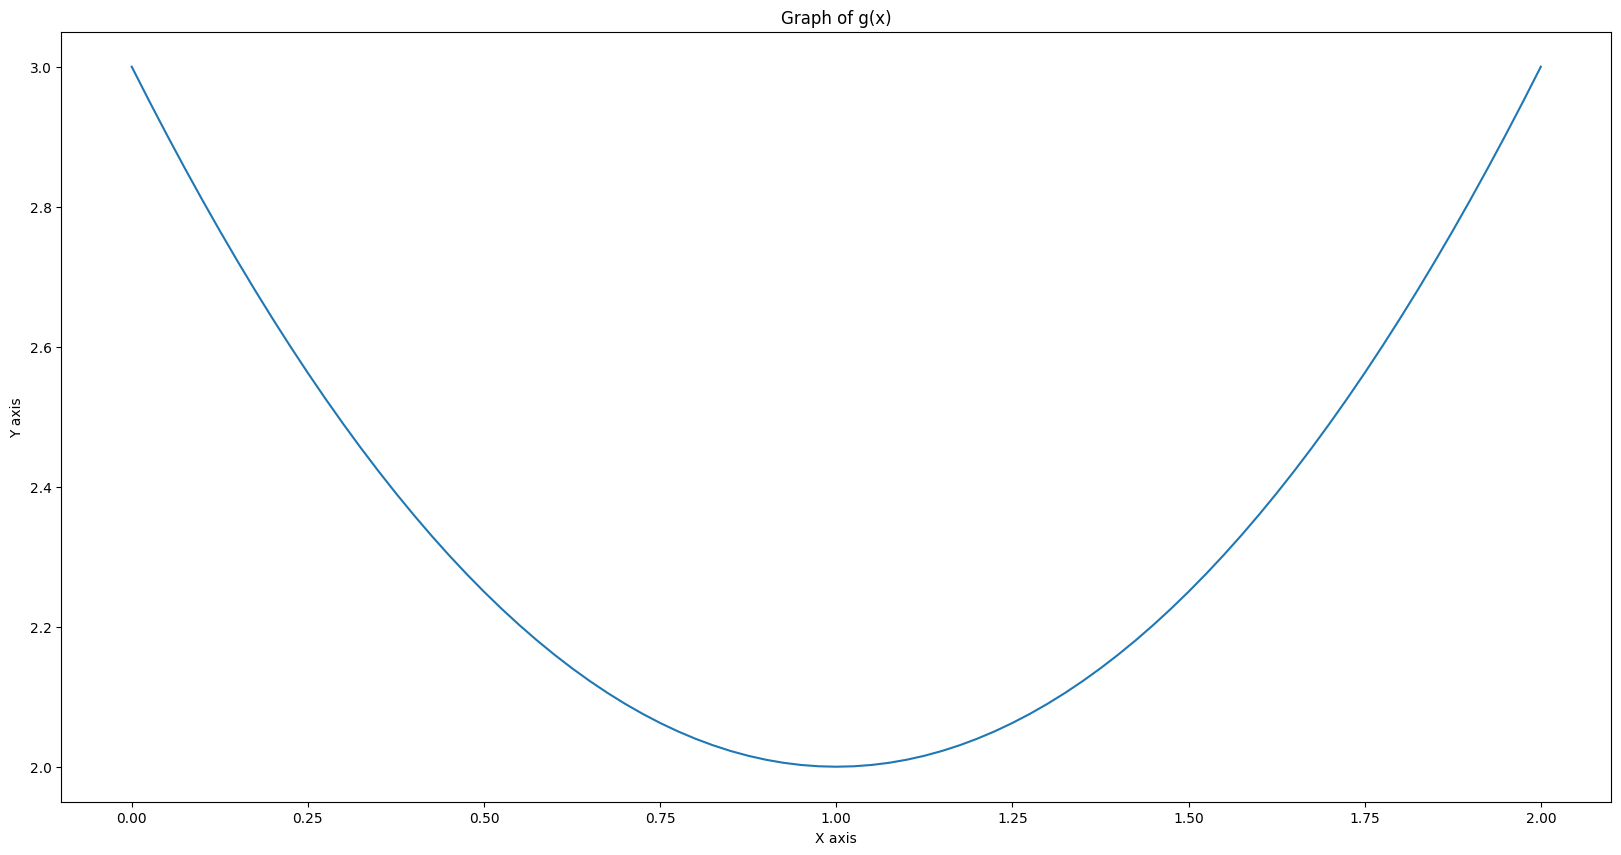

In [5]:
x = np.array(list(range(0,81,1)))/40
y = g(x)

plt.plot(x,y)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Graph of g(x)')

plt.show()



We can see from this plot that the minimum value the function takes is 2 and this value is obtained at $x=1$.

We want to now use gradient descent to find this value of $x=1$.

### Gradient Descent Step

Recall that the gradient descent algorithm finds the minimum of a function $g(x)$ by starting at some point $x_0$ and then defines a new point $x_1$ by moving in the direction against the gradient i.e.

$$ x_1 = x_0 - \alpha g'(x_0) $$.

The $\alpha$ is called the learning rate and $g'(x_0)$ is the value of the derivative (gradient) of the function $g(x)$ at $x_0$.

In the example here the function is:

$$g(x) = x^2 -2x+3$$

so the derivative at $x$ is given by:

$$g'(x) = 2x - 2$$.

So if the starting point is $x_0 = 3$ then,

$$g'(x_0) = g'(3) = 4$$.

Hence, if the learning rate is $\alpha = 0.1$ then the new x value is

$$ x_1 = x_0 - \alpha * g'(x_0) = 3 - 0.1\times 4 = 2.6$$.

So the new x value is $x_1 = 2.6$.


#### Task:

Your task is to write a function which will output the new x-value given the current x-value when the function is $g(x)$ given given above. Additionally, let the learning rate by $\alpha = 0.1$.

In [6]:
def newX(oldx):
  return oldx - (0.1 * ((2 * oldx) - 2))

newX(3)

2.6

#### Solution



In [7]:
def gd_update(x):
  x_new = x - 0.1*(2*x - 2)
  return x_new

#### Task:

Now update your function to allow the user to define the learning rate.

In [8]:
def newXLearnRate(oldx, learnRate):
  return oldx - (learnRate * ((2 * oldx) - 2))

newXLearnRate(3, 0.5)

1.0

#### Solution

In [9]:
def gd_update_new(x,alpha):
  x_new = x - alpha*(2*x-2)
  return x_new

### Gradient Descent Implementation

Now that we can compute the next value each time our task is to create a function which will complete a certain number of gradient descent steps.




#### Task:

The task is to create complete the code for the function below. This function will run gradient descent given the number of iterations, some learning rate (alpha) and some starting point $x_0$. This function will also keep track of the values of the function $g(x)$ in a list as gradient descent runs.

In [10]:
def gradDesc(iterations, learnRate, x):
  prevx = [x]

  for i in range(iterations):
    x = newXLearnRate(x, learnRate)
    prevx.append(x)
  return x, prevx

gradDesc(30, 0.1, 10)

(1.0111414603535684,
 [10,
  8.2,
  6.76,
  5.608,
  4.6864,
  3.9491199999999997,
  3.3592959999999996,
  2.8874367999999997,
  2.5099494399999998,
  2.2079595519999997,
  1.9663676415999998,
  1.7730941132799998,
  1.6184752906239999,
  1.4947802324992,
  1.3958241859993599,
  1.316659348799488,
  1.2533274790395903,
  1.2026619832316723,
  1.1621295865853378,
  1.1297036692682703,
  1.1037629354146161,
  1.0830103483316929,
  1.0664082786653544,
  1.0531266229322835,
  1.0425012983458268,
  1.0340010386766614,
  1.0272008309413292,
  1.0217606647530633,
  1.0174085318024506,
  1.0139268254419604,
  1.0111414603535684])

#### Solution:

In [11]:
def GD_runner(x_0,alpha,iterations):

    x = x_0

    g_values = [g(x)]

    for i in range(iterations):

        x = gd_update_new(x,alpha)
        g_values.append(g(x))

    return [x,g_values]

### Visualise Gradient Descent

The last thing to do is to check that gradient descent is working. To do this we values of the function against the number of interations.  

#### Task:

Plot the values of the function against the number of interations.

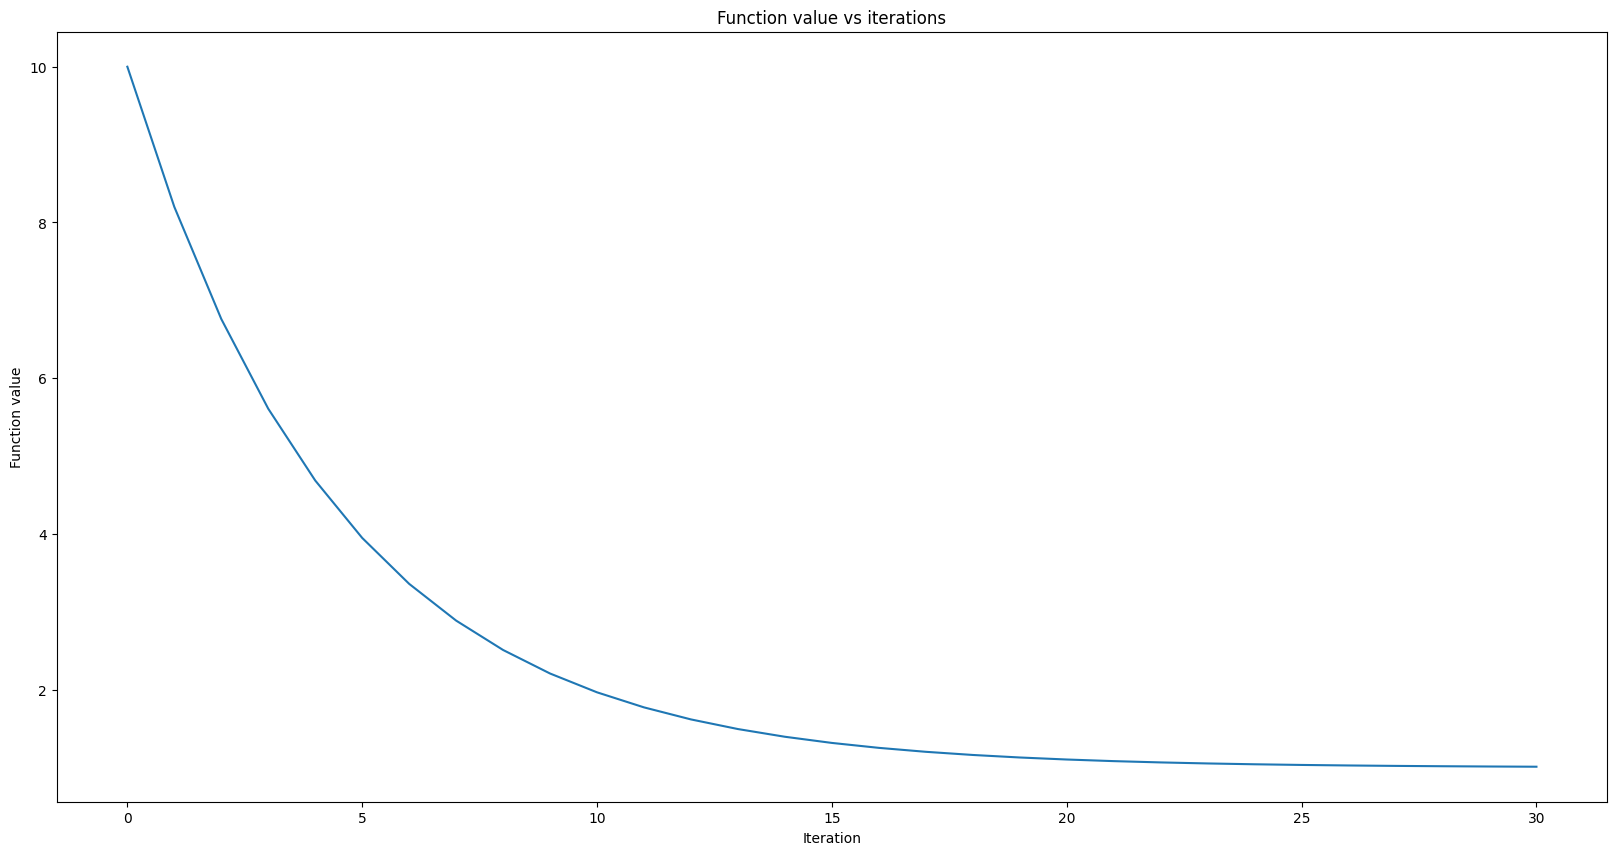

In [12]:
numIterations = 30

iterations = list(range(0,numIterations + 1))
x, gValues = gradDesc(numIterations, 0.1, 10)

plt.plot(iterations, gValues)

plt.xlabel('Iteration')

plt.ylabel('Function value')

plt.title('Function value vs iterations')

plt.show()

#### Solution:

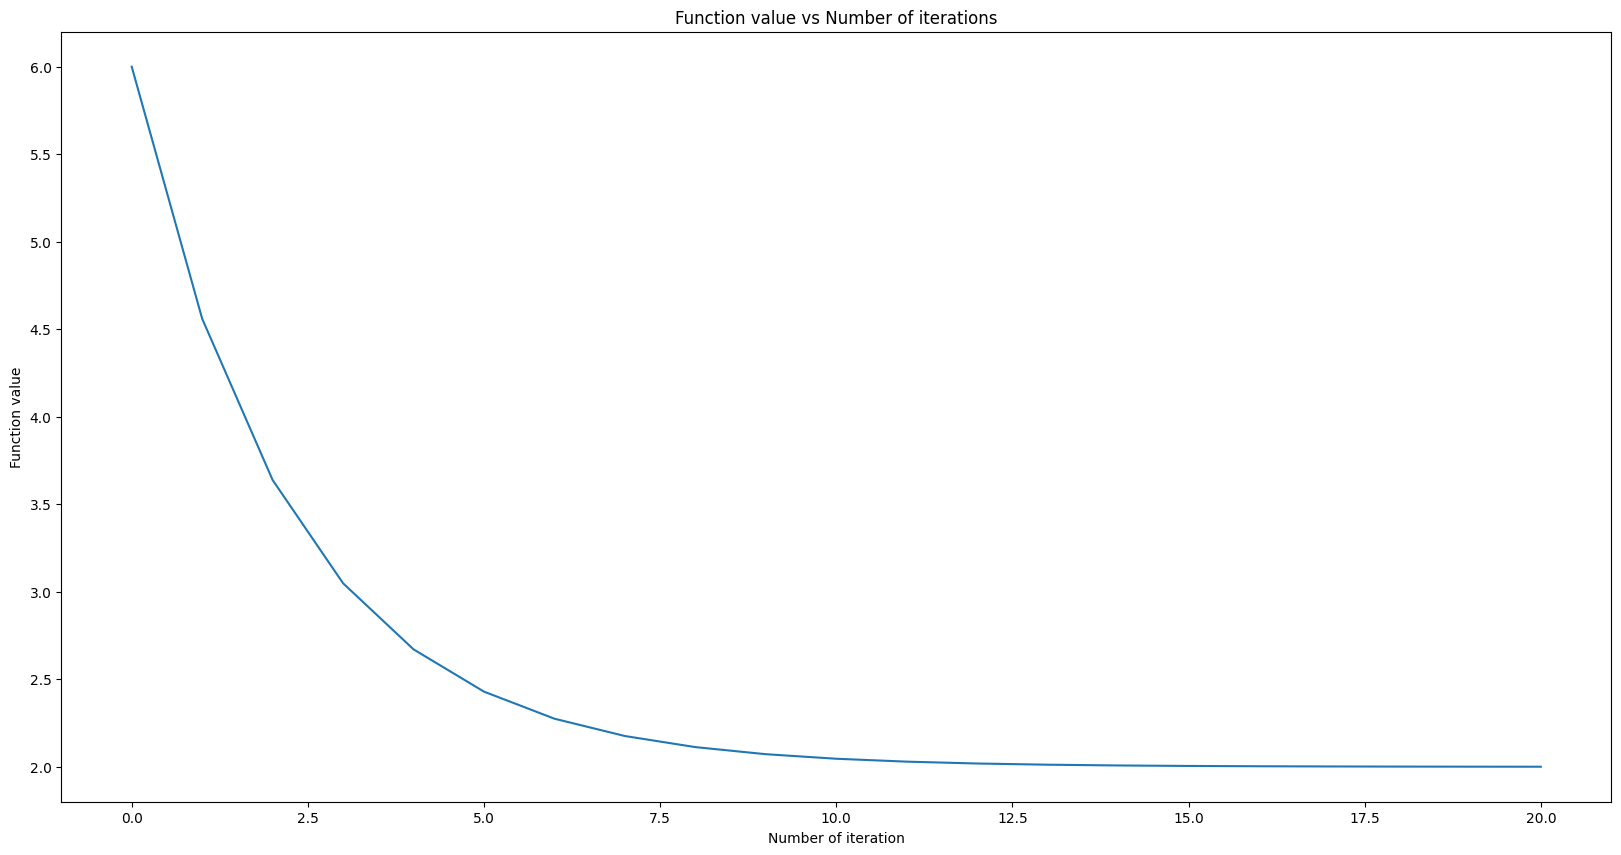

In [13]:
iterations = list(range(0,21))
[x,g_values] = GD_runner(3,0.1,20)

plt.plot(iterations, g_values)

plt.xlabel('Number of iteration')

plt.ylabel('Function value')

plt.title('Function value vs Number of iterations')

plt.show()

The above plot clearly shows that the value of the function is decreasing and becomes constant which indicates that we have reached a minimum.

### Gradient Descent With Unknown Derivative

In the above we knew that the derivative of $g(x)$ was $g'(x) = 2x -2$. Let's now suppose that this derivative is not known. In this case we could simply try to estimate the derivative of $g(x)$.

To do this we note that the derivative of $g$ at $x$ is roughly the ratio of the change in value of $g$ as $x$ changes a small amount (i.e. $g(x+h) - g(x)$) with the amount $x$ changes (i.e. $h$). That is for small enough $h$,

$$ g'(x) \approx \frac{g(x+h)-g(x)}{h}$$.

So if we don't know an exact formula for $g'(x)$ we could approximately work it out by computing this ratio for a small value of $h$.


In practice a better formula to use is:

$$ g'(x) \approx \frac{g(x+h) - g(x-h)}{2h} $$

#### Task:

Define a function to compute this approximate for the derivative of a function $g$ at $x$ assuming that a function $g$ is defined already. This function should take in $h$ and $x$ as the inputs.

In [14]:
def approxDerivative(x, h):
  return (g(x + h) - g(x)) / h

approxDerivative(10, 0.001)

18.000999999998157

#### Solution:



In [15]:
def approx_derivative(x,h):
  approx = (g(x+h) - g(x))/h
  return approx

#### Task:

Now tweak the gradient descent implementation from above to use this approximation instead. Then run this new implementation and check it works.

In [16]:
def newXApprox(x, learnRate):
  return x - learnRate * approxDerivative(x, 0.001)

def gradDescApprox(iterations, learnRate, x):
  prevx = [x]

  for i in range(iterations):
    x = newXApprox(x, learnRate)
    prevx.append(x)
  return x, prevx

gradDescApprox(30, 0.1, 10)

(1.010642079323567,
 [10,
  8.199900000000184,
  6.759820000001184,
  5.607756000000421,
  4.686104800000237,
  3.948783839999983,
  3.3589270719998865,
  2.8870416575999336,
  2.509533326079918,
  2.2075266608639588,
  1.9659213286911914,
  1.7726370629529775,
  1.6180096503623975,
  1.4943077202899246,
  1.395346176231973,
  1.316176940985594,
  1.252841552788455,
  1.2021732422307885,
  1.1616385937846552,
  1.1292108750277219,
  1.1032687000222108,
  1.0825149600177575,
  1.0659119680141682,
  1.0526295744113146,
  1.0420036595290583,
  1.0335029276232444,
  1.0267023420986199,
  1.0212618736788492,
  1.0169094989430771,
  1.013427599154495,
  1.010642079323567])

#### Solution:



In [17]:
def gd_update_new_2(x,alpha):
  x_new = x - alpha*approx_derivative(x,0.0001)
  return x_new

def GD_runner_new(x_0,alpha,iterations):

    x = x_0

    g_values = [g(x)]

    for i in range(iterations):

        x = gd_update_new_2(x,alpha)
        g_values.append(g(x))

    return [x,g_values]

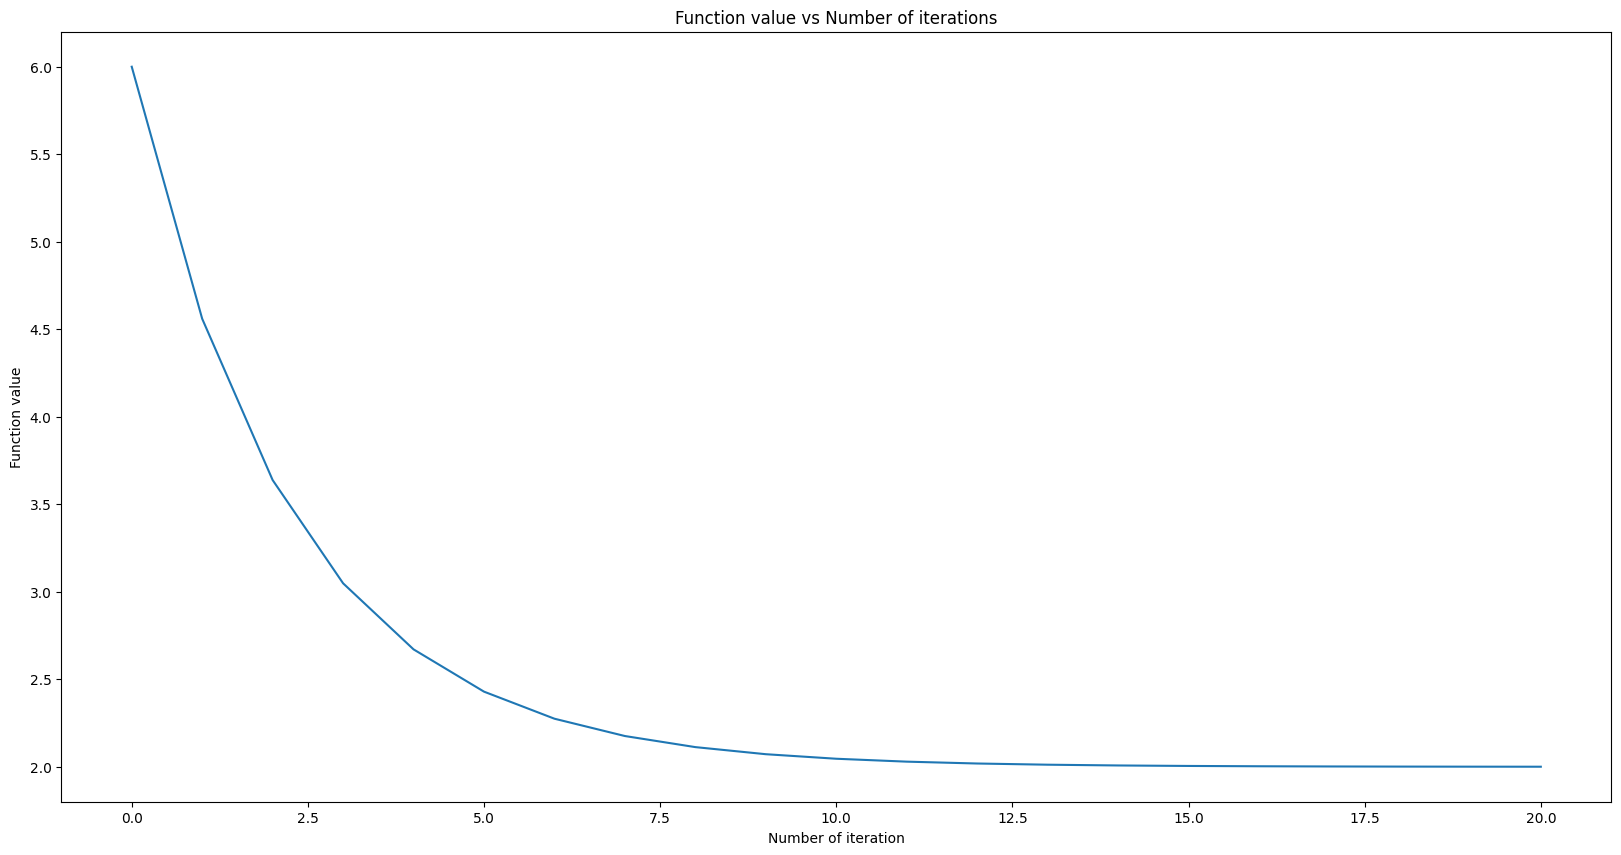

In [18]:
interations = list(range(0,21))
[x,g_values] = GD_runner_new(3,0.1,20)

plt.plot(interations, g_values)

plt.xlabel('Number of iteration')

plt.ylabel('Function value')

plt.title('Function value vs Number of iterations')

plt.show()

### Gradient Descent With Multiple Variables

So far we have been able to implement gradient descent in the case when our function only depends on one variable $x$. What about if it depends on multiple variables $x, y$ and $z$ for example i.e.

$$g(x,y,z) = 4x^2+ xy + \frac{y^2}{16} +  z^4 + 11$$.

In this situation how can we implement gradient descent?

The implementation is the same as before except now our function changes in multiple directions i.e. the x, y and z direction. We still move against the gradient, which in this case, is a vector of derivatives (one for each direction).

$$ \nabla g (x_0,y_0,z_0)= \left[\frac{\partial g}{\partial x}(x_0,y_0,z_0),\frac{\partial g}{\partial y}(x_0,y_0,z_0),\frac{\partial g}{\partial z}(x_0,y_0,z_0)\right] $$.

Here the $\nabla g(x_0,y_0,z_0)$ stands for the gradient of $g$ at $(x_0,y_0,z_0)$ and $\frac{\partial g}{\partial x}(x_0,y_0,z_0)$ is the derivative (called partial derivative) of $g$ in the $x$-direction at $(x_0,y_0,z_0)$. Likewise for $\frac{\partial g}{\partial y}$ and $\frac{\partial g}{\partial z}$.

To work these derivatives out we can do each at a time. Firstly, to work out the derivative in the x direction we can imagine that $y_0$ and $z_0$ are fixed numbers (like 5 and 1 for example) and only the value of $x$ is able to change. This can be thought of as a new function:

$$g_1(x) = 4x^2+ xy_0 + \frac{y_0^2}{16} +  z_0^4 + 11$$

where we note that $g_1$ is a function of one variable $x$ as the $y_0$ and $z_0$ are fixed. We now just need to work out the derivative of this function which we can approximate using our function earlier. Namely, for a small enough $h$ the derivative of $g_1$ at $x_0$ is given by,

$$ \frac{\partial g}{\partial x}(x_0,y_0,z_0) = g'_1(x_0) \approx \frac{g_1(x_0+h) -g_1(x_0)}{h} $$

Note that as $g_1(x) = g(x,y_0,z_0)$ where $y_0$ and $z_0$ are fixed we see that $g_1(x_0+h) = g(x_0+h,y_0,z_0)$ i.e.

$$ \frac{\partial g}{\partial x}(x_0,y_0,z_0) = g'_1(x_0) \approx \frac{g_1(x_0+h) -g_1(x_0)}{h} = \frac{g(x_0+h,y_0,z_0) -g(x_0,y_0,z_0)}{h} $$

Therefore, the derivative in the x direction is approximately given by,

$$ \frac{\partial g}{\partial x}(x_0,y_0,z_0) \approx  \frac{g(x_0+h,y_0,z_0) -g(x_0,y_0,z_0)}{h} $$

In a very simliar way the derivative in the y and z directions are approximately given by,

$$ \frac{\partial g}{\partial y}(x_0,y_0,z_0) \approx  \frac{g(x_0,y_0+h,z_0) -g(x_0,y_0,z_0)}{h} $$

$$ \frac{\partial g}{\partial z}(x_0,y_0,z_0) \approx  \frac{g(x_0,y_0,z_0+h) -g(x_0,y_0,z_0)}{h} $$

Hence to work out the gradient we need to just work out the derivative in each direction. Each of these derivatives can be approximated using the function we defined earlier.


Let's apply gradient descent to the function above. Firstly, let's define the function which we shall call g_new

In [19]:
def g_new(v):

    return 4*v[0]**2 + v[0]*v[1] + (v[1]**2)/16 + v[2]**4 + 11

# Now given the function we want a function that will roughly work out the rate of change
# with respect to a given coordinate direction

def partial_difference_quotient(v, i, h=0.0001):

    # Here we must first move v_i in a small distance h whilst keeping the rest fixed.
    w = v[:]

    for  j in range(len(v)):

        if j==i:

            w[j] += h

    return (g_new(w) - g_new(v)) / h

# Next we want a function which uses our last function for estimating the rate of change and
# returns the estimate of the gradient in a list.

def estimate_gradient(v,h=0.0001):

    grad_est =[]

    for i in range(len(v)):

        grad_est.append(partial_difference_quotient(v, i, h))

    return grad_est

In [20]:
estimate_gradient([2,1,2])

[17.000400000029003, 2.1250062499689193, 32.002400080060056]

We can now use the estimate_gradient in our gradient descent function instead of the approx_derivative. Note that the way the functions have be written means that the estimate_gradient and approx_gradient are essentially the same when there is only one variable.

In [21]:
def gd_update_general(v,alpha):

    direction = estimate_gradient(v)

    for i in range(len(v)):

        v[i] = v[i] - alpha*direction[i]

    return v

def GD_runner_general(v_0,alpha,iterations):

    v = v_0[:]

    g_values = [g_new(v)]

    for i in range(iterations):

        v = gd_update_general(v,alpha)
        g_values.append(g_new(v))

    return [v,g_values]

Let's test to see if this version of gradient descent works correctly.

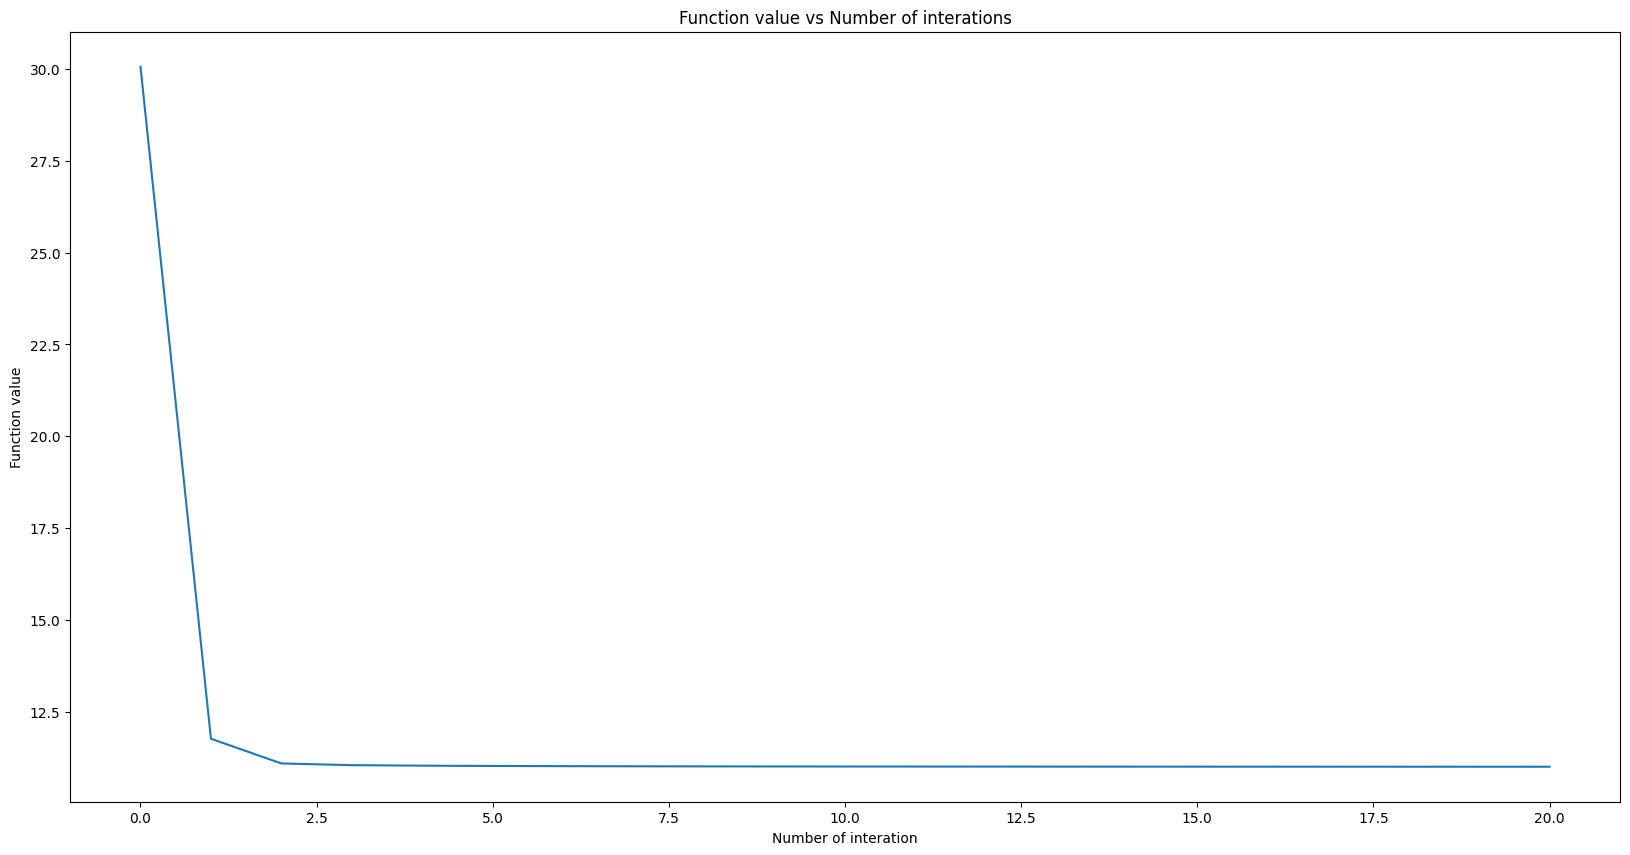

In [22]:
[v,gvalues] = GD_runner_general([2,1,1],0.1,20)

plt.plot(list(range(21)),gvalues)

plt.xlabel('Number of interation')

plt.ylabel('Function value')

plt.title('Function value vs Number of interations')

plt.show()

It looks like the gradient descent algorithm has converged to a minimum.

In [23]:
v

[-0.0923670295864838, 0.7385416213013798, 0.22808398519435968]

As we might have seen by simply looking at the formula for the function the minimum is attained at (0,0,0).

## Bringing it all together

Before we move onto the simple linear regression example we quickly bring everything together. Firstly, so far our code has only worked for the one function it has been defined for i.e. g or g_new. To make our code work in a more general fashion we could simply let one of the inputs in each of the gradient descent functions be the function we want to minimise.

In [24]:
# update function to take in a function, instead of using g or g_new
def partial_difference_quotient(v, i, h, function):

    w = v[:]

    for  j in range(len(v)):

        if j==i:

            w[j] += h

    return (function(w) - function(v)) / h

# add function variable to estimate_gradient
def estimate_gradient(v, h, function):

    grad_est =[]

    for i in range(len(v)):

        grad_est.append(partial_difference_quotient(v, i, h, function))

    return grad_est

# add function variable to gd_update_general
def gd_update_general(v, alpha, function):

    direction = estimate_gradient(v, 0.00001, function)

    for i in range(len(v)):

        v[i] = v[i] - alpha*direction[i]

    return v

# add function variable to gd_runner_general
def gd_runner_general(v_0, alpha, iterations, function):

    v = v_0[:]

    g_values = [function(v)]

    for i in range(iterations):

        v = gd_update_general(v, alpha, function)
        g_values.append(function(v))

    return [v,g_values]

In [25]:
# use g_new to test code
[v, values] = gd_runner_general([10,5,2,1], 0.2, 20, g_new)
print(values)

[478.5625, 562.2179831585861, 16515803.03857847, 1.8429719772583965e+21, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63, 2.5639759784355164e+63]


#### Solution

In [26]:
def partial_difference_quotient(v, i, h,function):

    # Here we must first move v_i in a small distance h whilst keeping the rest fixed.
    w = v[:]

    for  j in range(len(v)):

        if j==i:

            w[j] += h

    return (function(w) - function(v)) / h

# Next we want a function which uses our last function for estimating the rate of change and
# returns the estimate of the gradient in a list.

def estimate_gradient(v,h,function):

    grad_est =[]

    for i in range(len(v)):

        grad_est.append(partial_difference_quotient(v, i, h,function))

    return grad_est

def gd_update_general(v,alpha,function):

    direction = estimate_gradient(v,0.00001,function)

    for i in range(len(v)):

        v[i] = v[i] -alpha*direction[i]

    return v

def GD_runner_general(v_0,alpha,iterations,function):

    v = v_0

    g_values = [function(v)]

    for i in range(iterations):

        v = gd_update_general(v,alpha,function)
        g_values.append(function(v))

    return [v,g_values]

In [27]:
def test(v):
    return v[0]**2 - v[0]*v[1] + v[2]**5 + 11

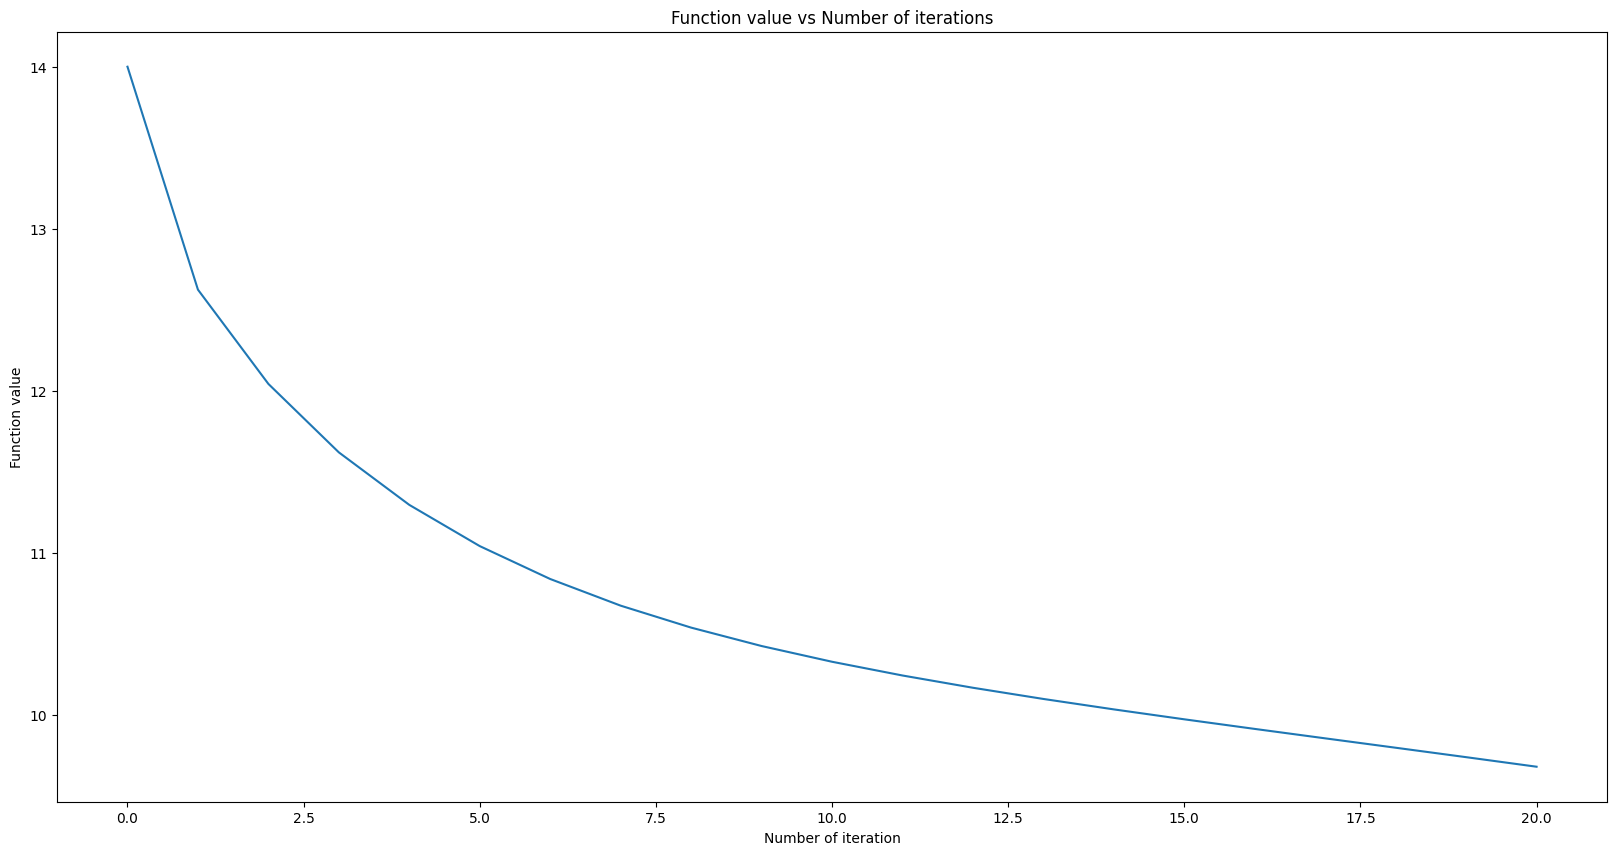

In [28]:
[v,gvalues] = GD_runner_general([2,1,1,3],0.05,20, test)

plt.plot(list(range(21)),gvalues)

plt.xlabel('Number of iteration')

plt.ylabel('Function value')

plt.title('Function value vs Number of iterations')

plt.show()

## The Data

Firstly, we shall need some data to work with so we shall use data we have seen previously for house prices. Here we want to fit a simple linear regression model to model the relationship between the two variables. Here sq_feet is the feature and house price is the response.  

In [29]:
house_price = [245,
312,
279,
308,
199,
219,
405,
324,
319,
255
]
sq_feet = [1400,
1600,
1700,
1875,
1100,
1550,
2350,
2450,
1425,
1700
]

In [30]:
sq_feet = [i/2000 for i in sq_feet]

In [31]:
house_price = [i/100 for i in house_price]

## The Cost Function

To train a machine learning model often we need to minimise some kind of cost function. This usually means finding the parameters of the model which makes the cost function as small as possible. In the case of simple linear regression this cost function is given by:

$$  C(\beta_0, \beta_1) = \frac{1}{2m}\sum_{i=1}^m (y^i - (\beta_0 + \beta_1 x^i))^2. $$

where $(\beta_0, \beta_1)$ are the parameters and $\{ (x^1, y^1),...,(x^m,y^m)\}$ is the data.



### Task

Use the gradient descent code we created earlier to fit a linear regression model to this data. This means you need to use the gradient descent algorithm to find the parameters $(\beta_0, \beta_1)$ which minimise the cost function $C(\beta_0,\beta_1)$.

In [32]:
def cost(v):
  totalCost = 0
  for i in range(len(house_price)):
    error = house_price[i] - v[0] - v[1] * sq_feet[i]
    errorSq = error ** 2
    totalCost += errorSq

  totalCost = totalCost / (2 * len(house_price))
  return totalCost

# use cost function in gd_runner_general for function variable
[v, values] = gd_runner_general([1, 1], 0.1, 20, cost)
print(values)

[0.603924375, 0.43560499933399, 0.32108968716764463, 0.2431755702031247, 0.19016010527930233, 0.1540824381418038, 0.12952706158987376, 0.1128099838149523, 0.10142510570967311, 0.09366760970097246, 0.088377763647047, 0.0847666391044721, 0.08229755322686144, 0.08060541760032308, 0.07944187391499775, 0.07863797156614015, 0.07807877845080274, 0.07768610952310692, 0.077406777593385, 0.07720460072814675, 0.07705496514210079]


#### Solution

In [33]:
def cost(v):

  cost = 0

  for i  in range(len(house_price)):

    error = house_price[i] - v[0] - v[1]*sq_feet[i]
    error_sq = error**2
    cost = cost + error_sq

  cost = cost / (2*len(house_price))

  return cost

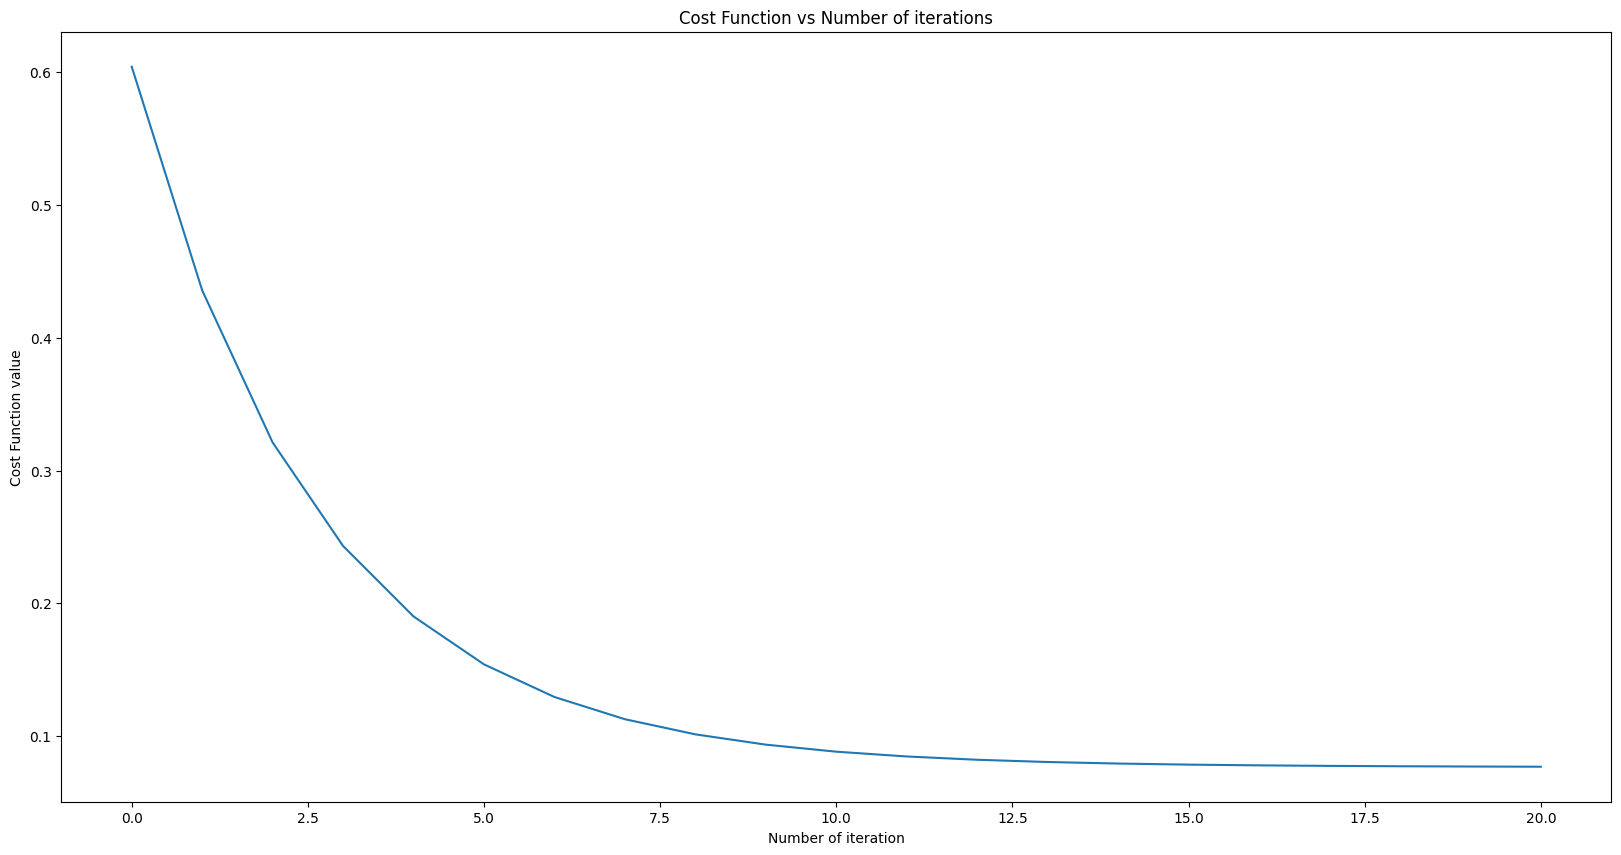

In [34]:
[v,gvalues] = GD_runner_general([1,1],0.1,20,cost)

plt.plot(list(range(21)),gvalues)

plt.xlabel('Number of iteration')

plt.ylabel('Cost Function value')

plt.title('Cost Function vs Number of iterations')

plt.show()

In [35]:
v

[1.5439625869055331, 1.5303004279244572]

### Task

Use the gradient descent code to fit a linear regression model to the exam score data and compare your result to what we found previously.

In [36]:
url = "https://github.com/cm326/Data/raw/master/exam_results.csv"

data = pd.read_csv(url, index_col = 0).round(1)

data.head()

,Study Hours,Exam Score
0,5.5,63.3
1,7.2,57.0
2,5.4,54.1
3,4.2,50.6
4,6.5,52.4


In [46]:
x = data['Study Hours'].tolist()
y = data['Exam Score'].tolist()

def examScoreFunc(v):
  score = 0
  for i in range(len(x)):
    error = x[i] - v[0] -v[1] * y[i]
    errorSq = error ** 2
    score += errorSq

  score = score / (2 * len(x))
  return score

# put the exam score function into the gradient decent function
[v, values] = gd_runner_general([5.5, 63.3], 0.00001, 16, examScoreFunc)
print(values)

[8104561.927759499, 7461954.097265509, 6870298.433887903, 6325554.957585655, 5824004.015228841, 5362220.886601649, 4937052.392856082, 4545595.371972888, 4185176.8526578923, 3853335.8016148596, 3547806.321186911, 3266502.175118046, 3007502.544325795, 2769038.9111159877, 2549482.982740627, 2347335.57410127, 2161216.368558273]


In [47]:
v

[5.041546151973307, 32.69531548740342]

#### Comparison with Linear Regression Example
**Results from Example**

Intercept: 31.348908763454972 <br>
Slope: 6.072673214462367

**Results from Gradient Descent**

Intercept: 32.69531548740342 <br>
Slope: 5.041546151973307 <br>

This result with gradient descent was achieved with a starting point of 5.5 hours of studying with a result of 63.3. This data was chosen from the provided dataset and should roughly represent the dataset. The learning rate for the gradient descent was 0.00001, with the number of interactions set at 16 using the examScoreFunc which is the model for linear regression.

The result from the gradient descent model is within ~ 4% of the linear regression model example for the intercept. For the Slope, the gradient descent model is within ~ 17% of the linear regression model.

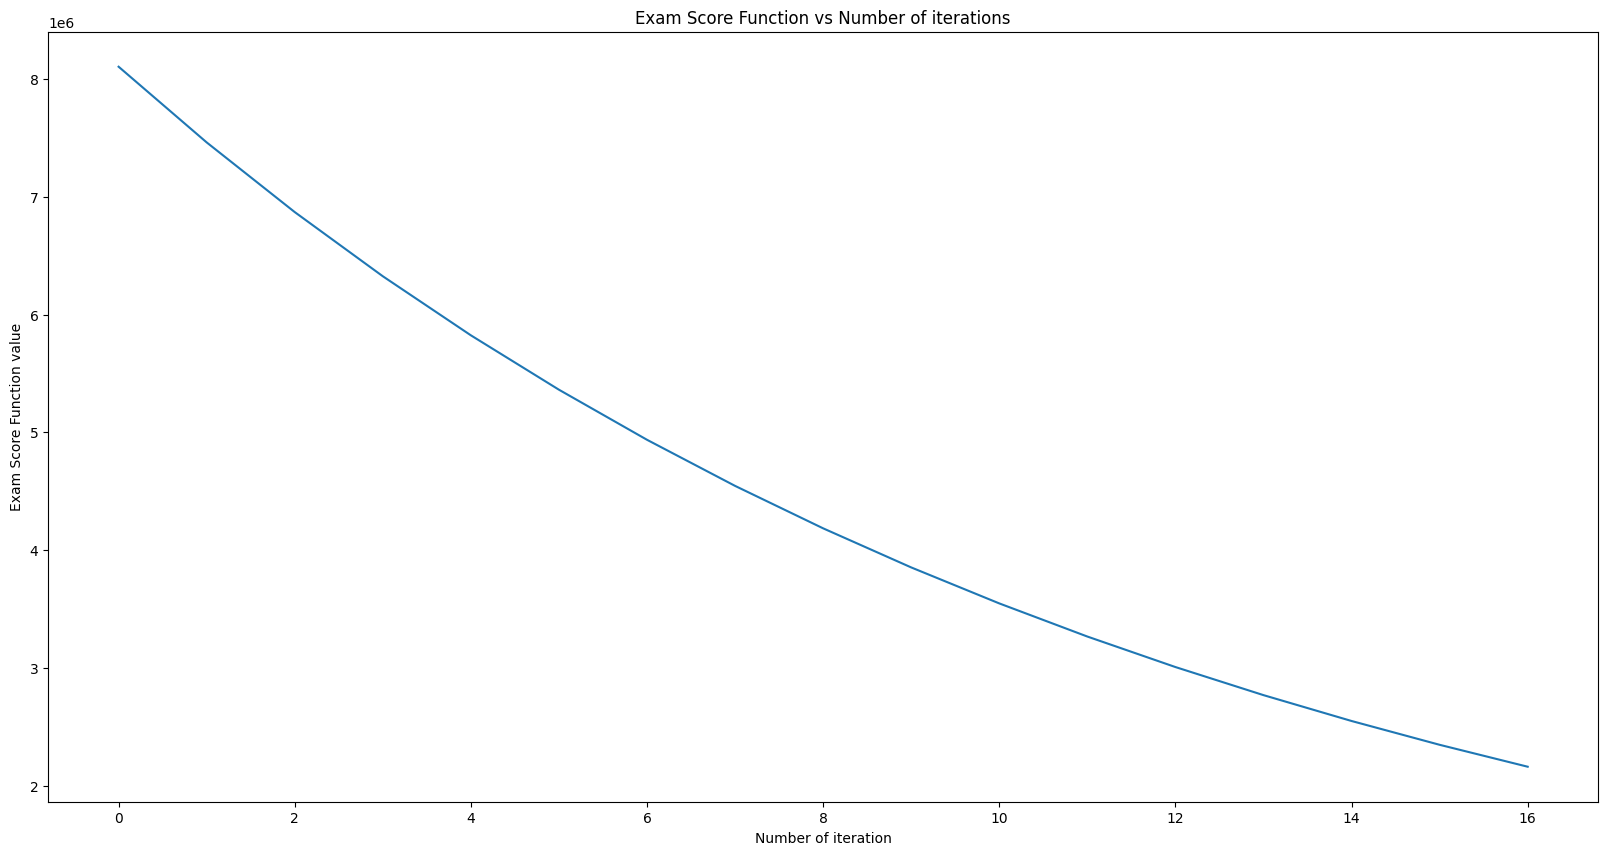

In [48]:
[v,gvalues] = gd_runner_general([5.5, 63.3], 0.00001, 16, examScoreFunc)

plt.plot(list(range(17)),gvalues)

plt.xlabel('Number of iteration')

plt.ylabel('Exam Score Function value')

plt.title('Exam Score Function vs Number of iterations')

plt.show()